In [1]:
!pip install pdf2image
!pip install python-poppler-qt5
!pip install layoutparser torchvision
!pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
!pip install "layoutparser[ocr]"
!pip install opencv-python-headless
!pip install tabula-py

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 5.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 22.0 MB/s eta 0:00:00


In [2]:
import pdf2image
import os
import layoutparser as lp
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabula


In [3]:
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 2s (119 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.4_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.4) ...
Setting up poppler-utils (22.02.0-2ubuntu0.4) ...
Processing triggers for man-db (2.10.2-1) ...


In [4]:
from google.colab import files
uploaded = files.upload()


Saving NIh public Access.pdf to NIh public Access.pdf


In [5]:
import pdf2image
import os

# Get the name of the uploaded PDF file
pdf_path = list(uploaded.keys())[0]

# Convert the PDF to images
doc = pdf2image.convert_from_path(pdf_path)

# Print the number of pages and visualize the first page
print(f"Number of pages: {len(doc)}")
doc[0].show()  # Visualize the first page

Number of pages: 18


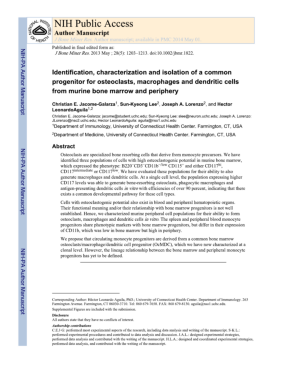

In [6]:
import matplotlib.pyplot as plt

# Display the first page
plt.imshow(doc[0])
plt.axis('off')  # Hide the axis
plt.show()


In [7]:
folder = "doc"
if not os.path.exists(folder):
    os.makedirs(folder)

for p, page in enumerate(doc, start=1):
    image_name = f"page_{p}.jpg"
    page.save(os.path.join(folder, image_name), "JPEG")

In [8]:
pip install "layoutparser[ocr]"

In [9]:
import layoutparser as lp
import cv2
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt

model_final.pth?dl=1: 856MB [00:39, 21.7MB/s]                           
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


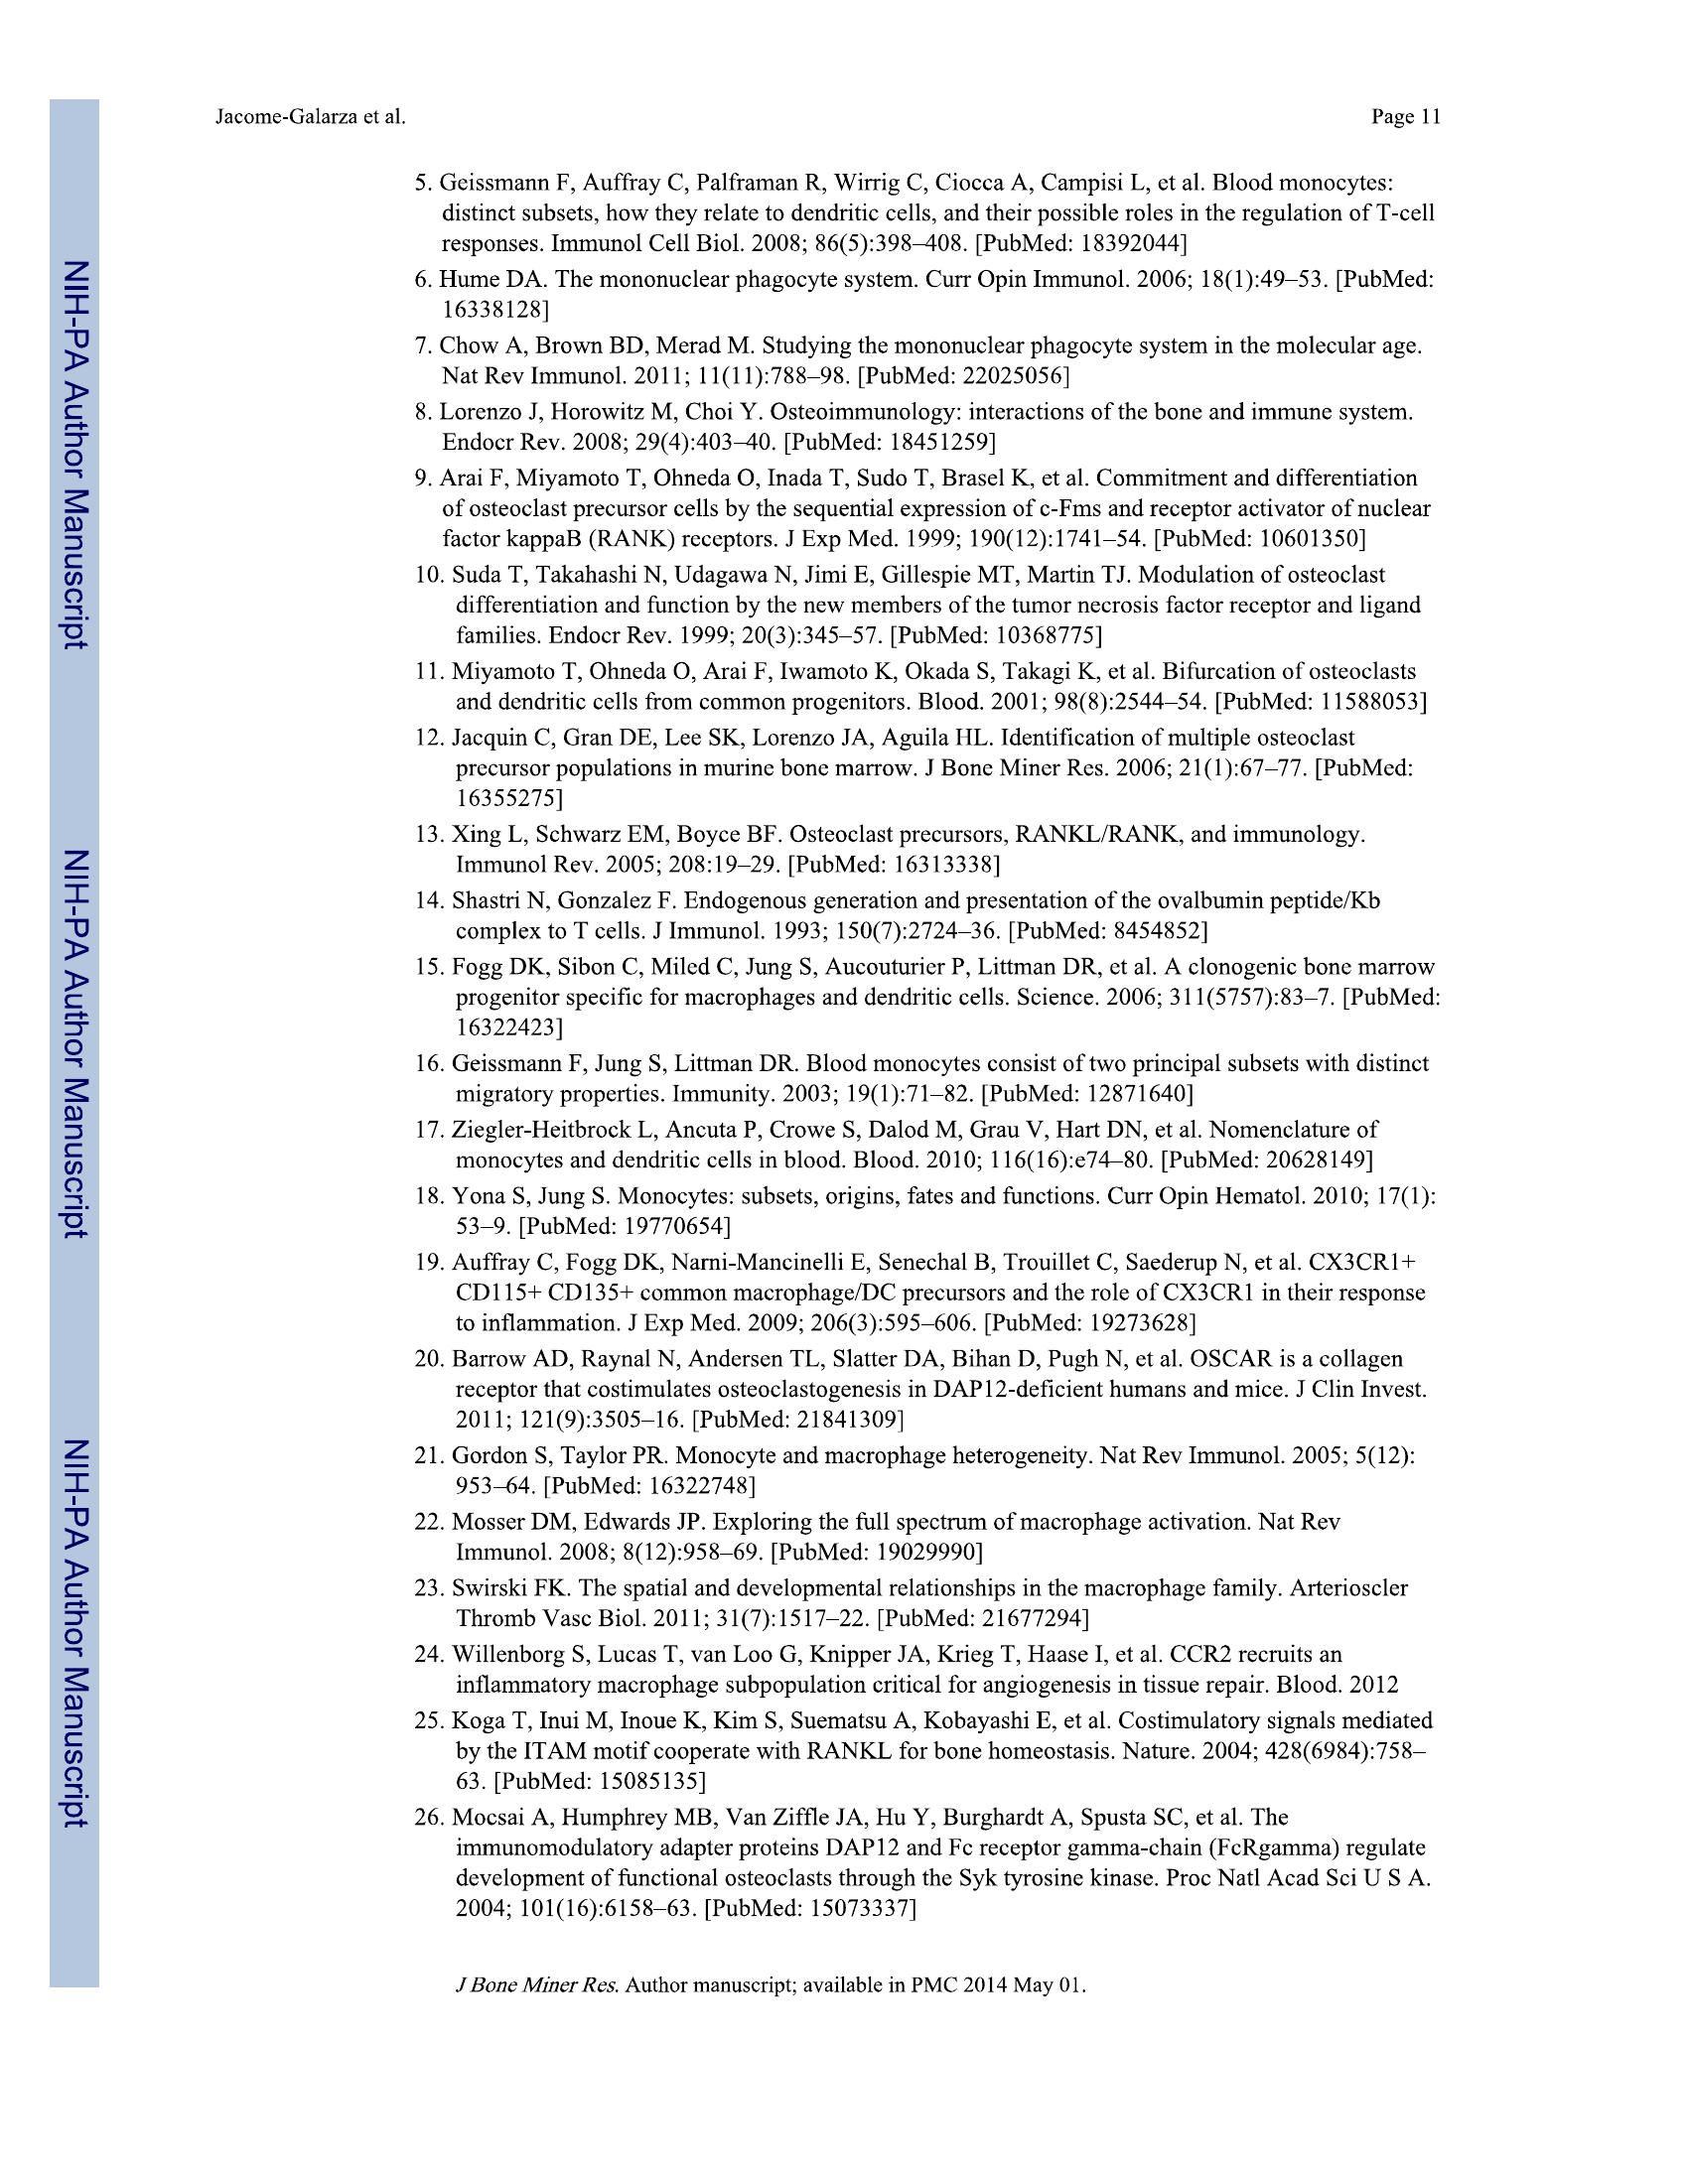

In [11]:
# Install required libraries
!pip install layoutparser numpy torch torchvision

# Import necessary libraries
import numpy as np
import layoutparser as lp
from PIL import Image

# Load pre-trained model
model = lp.Detectron2LayoutModel(
    "lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config",
    extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
    label_map={0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"})

# Define a function to visualize the detected layout
def visualize_layout(image, boxes):
    vis = image.copy()
    lp.draw_box(vis, boxes, box_width=5, box_alpha=0.2, show_element_type=True)
    return vis

# Load image from file or URL
# Example: img_path = 'https://example.com/image.jpg'
img_path = '/content/doc/page_11.jpg'
img = np.array(Image.open(img_path))

# Predict layout
detected = model.detect(img)

# Visualize layout
result_image = visualize_layout(img, detected)
Image.fromarray(result_image)


  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


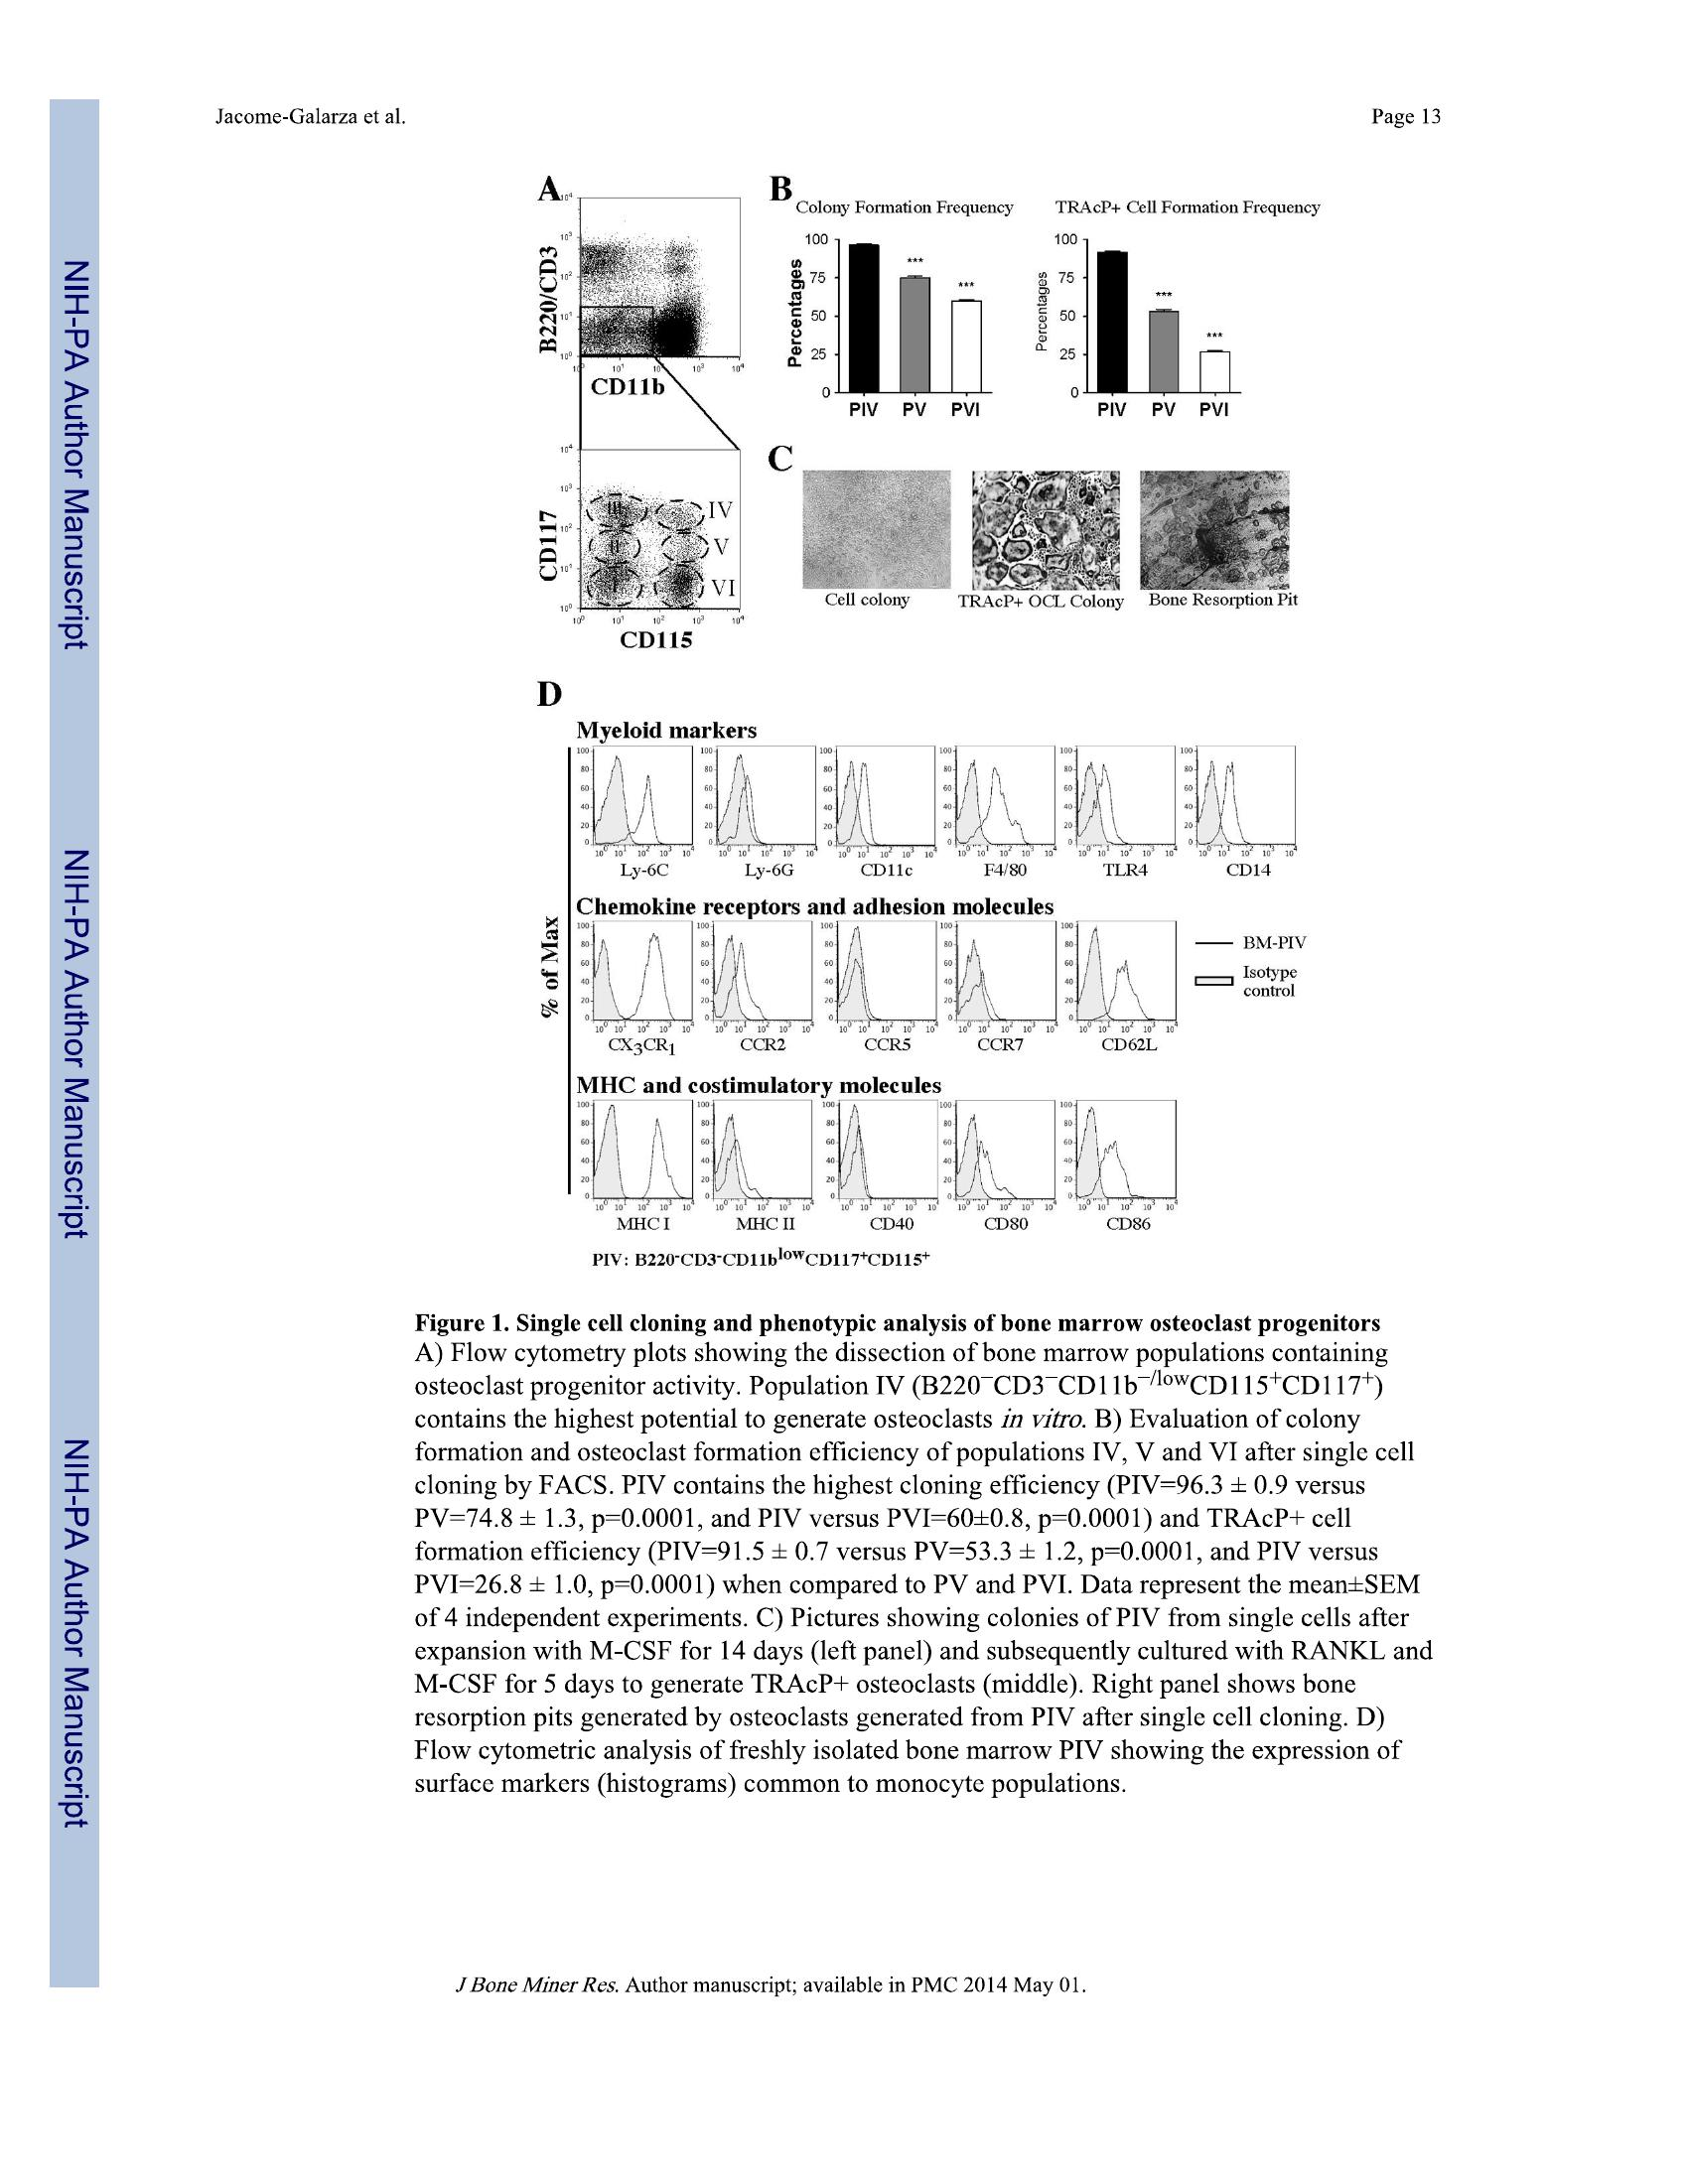

In [14]:
# Load pre-trained model
model = lp.Detectron2LayoutModel(
    "lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config",
    extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
    label_map={0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"})

# Define a function to visualize the detected layout
def visualize_layout(image, boxes):
    vis = image.copy()
    lp.draw_box(vis, boxes, box_width=5, box_alpha=0.2, show_element_type=True)
    return vis

# Load image from file or URL
# Example: img_path = 'https://example.com/image.jpg'
img_path = '/content/doc/page_13.jpg'
img = np.array(Image.open(img_path))

# Predict layout
detected = model.detect(img)

# Visualize layout
result_image = visualize_layout(img, detected)
Image.fromarray(result_image)

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


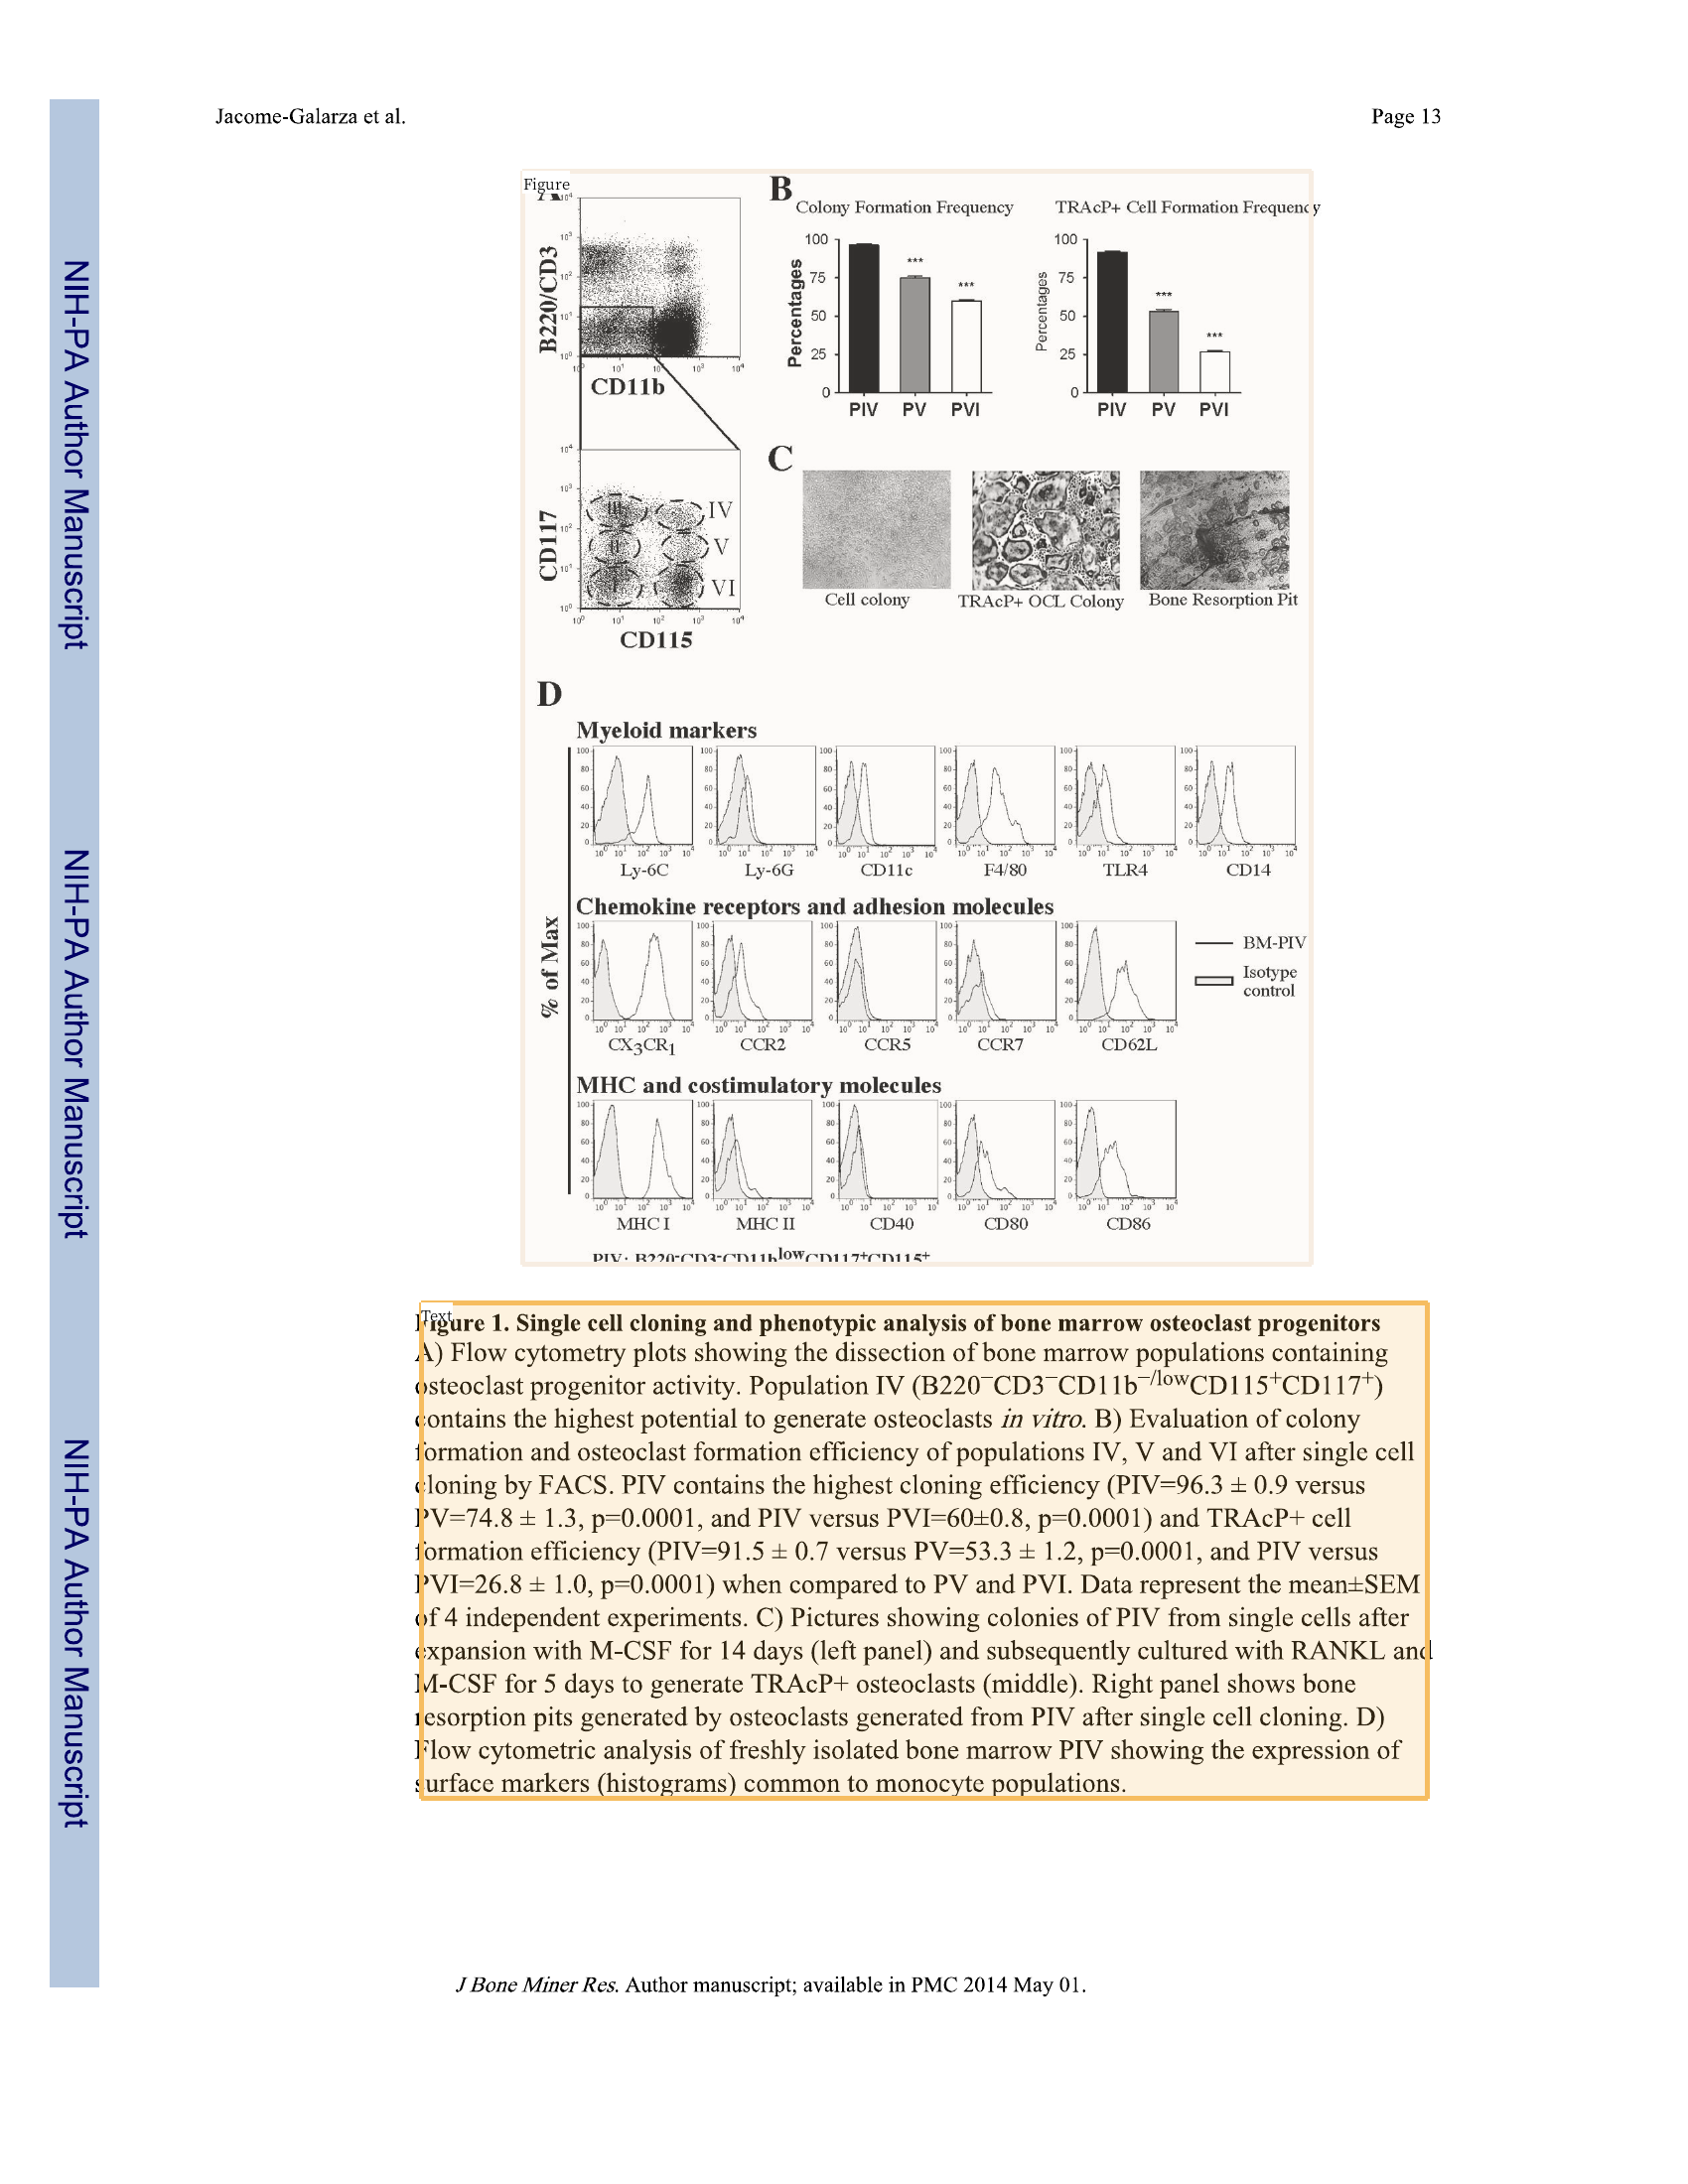

In [18]:
## load pre-trained model
model = lp.Detectron2LayoutModel(
   "lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config",
   extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
   label_map={0:"Text", 1:"Title", 2:"List", 3:"Table", 4:"Figure"})
## turn img into array
i = 12
img = np.asarray(doc[i])
## predict
detected = model.detect(img)
## plot
lp.draw_box(img, detected, box_width=5, box_alpha=0.2,
            show_element_type=True)

In [19]:
## sort
new_detected = detected.sort(key=lambda x: x.coordinates[1])
## assign ids
detected = lp.Layout([block.set(id=idx) for idx,block in
                      enumerate(new_detected)])
## check
for block in detected:
    print("---", str(block.id)+":", block.type, "---")
    print(block, end='\n\n')

--- 0: Figure ---
TextBlock(block=Rectangle(x_1=526.88671875, y_1=172.901611328125, x_2=1320.426513671875, y_2=1273.0172119140625), text=None, id=0, type=Figure, parent=None, next=None, score=0.9965630173683167)

--- 1: Text ---
TextBlock(block=Rectangle(x_1=424.3243103027344, y_1=1312.943115234375, x_2=1437.541748046875, y_2=1811.59033203125), text=None, id=1, type=Text, parent=None, next=None, score=0.9968264102935791)



In [23]:
import os

# Define directory names
figure_dir = 'figure'
text_dir = 'text'

# Create directories if they do not exist
os.makedirs(figure_dir, exist_ok=True)
os.makedirs(text_dir, exist_ok=True)

print("Directories created successfully.")


Directories created successfully.


In [32]:
import os
from PIL import Image
import numpy as np
import layoutparser as lp

# Create directories for storing figures and text
os.makedirs('figure', exist_ok=True)
os.makedirs('text', exist_ok=True)

# Load pre-trained model
model = lp.Detectron2LayoutModel(
    "lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config",
    extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
    label_map={0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"})

# Specify the index of the document page
i = 12

# Load the document page as an image array
img = np.asarray(doc[i])

# Predict layout
detected = model.detect(img)

# Save detected figures and text
for element in detected:
    if element.type == 'Figure':
        # Crop and save the figure
        x, y, w, h = map(int, element.coordinates)  # Ensure coordinates are integers
        figure_img = Image.fromarray(img[int(y):int(y+h), int(x):int(x+w)])
        figure_img.save(f'figure/figure_{element.id}.png')
    elif element.type == 'Text':
        # Crop and save the text
        x, y, w, h = map(int, element.coordinates)  # Ensure coordinates are integers
        text_img = Image.fromarray(img[int(y):int(y+h), int(x):int(x+w)])
        text_img.save(f'text/text_{element.id}.png')


  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


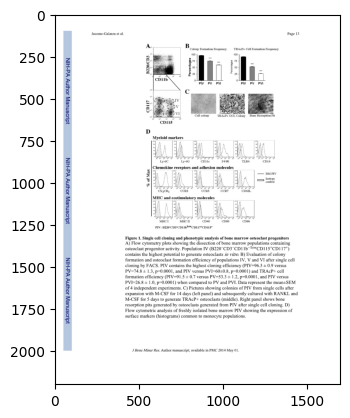

In [13]:
# Example to process the 22nd page (index 11)
i = 12
img = np.asarray(doc[i])

# Predict layout elements
detected = model.detect(img)

# Draw boxes on the detected elements
lp.draw_box(img, detected, box_width=5, box_alpha=0.2, show_element_type=True)
plt.imshow(img)
plt.show()

# Sort detected elements by their vertical position
new_detected = detected.sort(key=lambda x: x.coordinates[1])

# Assign IDs to each detected block
detected = lp.Layout([block.set(id=idx) for idx, block in enumerate(new_detected)])